In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.decomposition import PCA
from lingua import Language, LanguageDetectorBuilder

##Data Exploration and Cleaning

In [ ]:
df = pd.read_csv("/content/music_genres.csv")

In [ ]:
df

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Rap/Hip-Hop
40001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Rap/Hip-Hop
40002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Rap/Hip-Hop
40003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Rap/Hip-Hop


In [ ]:
df.shape

(40005, 18)

In [ ]:
rows_with_missing = df[df.isnull().any(axis=1)]
rows_with_missing

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.dropna(axis=0, subset=["popularity"], inplace=True)

In [ ]:
df

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40000,58878.0,BEXEY,GO GETTA,59.0,0.03340,0.913,-1.0,0.574,0.00000,C#,0.119,-7.022,Major,0.2980,98.02799999999999,4-Apr,0.330,Rap/Hip-Hop
40001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.00000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Rap/Hip-Hop
40002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.00000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Rap/Hip-Hop
40003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.00000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Rap/Hip-Hop


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40000 entries, 0 to 40004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       40000 non-null  float64
 1   artist_name       40000 non-null  object 
 2   track_name        40000 non-null  object 
 3   popularity        40000 non-null  float64
 4   acousticness      40000 non-null  float64
 5   danceability      40000 non-null  float64
 6   duration_ms       40000 non-null  float64
 7   energy            40000 non-null  float64
 8   instrumentalness  40000 non-null  float64
 9   key               40000 non-null  object 
 10  liveness          40000 non-null  float64
 11  loudness          40000 non-null  float64
 12  mode              40000 non-null  object 
 13  speechiness       40000 non-null  float64
 14  tempo             40000 non-null  object 
 15  obtained_date     40000 non-null  object 
 16  valence           40000 non-null  float6

In [ ]:
df.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,40000.000000,40000.000000,40000.000000,40000.000000,4.000000e+04,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,55868.374650,41.564550,0.340374,0.541717,2.256046e+05,0.579669,0.218082,0.193019,-9.763819,0.081310,0.456117
std,20712.174492,15.663822,0.357596,0.177990,1.364437e+05,0.277501,0.347978,0.163443,6.618278,0.089477,0.253987
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,37973.500000,31.000000,0.024475,0.427000,1.741470e+05,0.386000,0.000000,0.096000,-11.935000,0.035200,0.246750
50%,55913.500000,40.500000,0.177000,0.554000,2.210000e+05,0.627000,0.000639,0.125000,-7.742000,0.045500,0.449000
75%,73759.250000,53.000000,0.656000,0.668000,2.742270e+05,0.812000,0.399000,0.241000,-5.322000,0.078400,0.657000
max,91759.000000,96.000000,0.996000,0.979000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


In [ ]:
df.describe(include=['O'])

,artist_name,track_name,key,mode,tempo,obtained_date,music_genre
count,40000,40000,40000,40000,40000,40000,40000
unique,6070,35665,12,2,25980,5,8
top,empty_field,Summertime,G,Major,?,4-Apr,Electronic
freq,1970,13,4735,26118,3982,35384,5000


In [ ]:
tempo_missing = (df["tempo"] == "?").sum()
duration_missing = (df["duration_ms"] == -1.0).sum()
artist_missing = (df["artist_name"] == "empty_field").sum()

print(f"There are {tempo_missing} missing values in the tempo column.")
print(f"There are {duration_missing} missing values in the duration_ms column.")
print(f"There are {artist_missing} missing values in the artist_name column.")

There are 3982 missing values in the tempo column.
There are 3926 missing values in the duration_ms column.
There are 1970 missing values in the artist_name column.


In [ ]:
def fill_missing(data, impute=False):
  '''replaces placeholder values with NaN and replaces NaN values with the column mean if impute is True'''
  data = data.copy()
  data["duration_ms"] = data["duration_ms"].replace(-1.0, np.nan)
  data["tempo"] = data["tempo"].replace("?", np.nan)
  data["tempo"] = pd.to_numeric(data["tempo"])
  if impute:
    data["duration_ms"] = data["duration_ms"].replace(np.nan, data["duration_ms"].mean())
    data["tempo"] = data["tempo"].replace(np.nan, data["tempo"].mean())
  return data

In [ ]:
df = fill_missing(df)

#### Correlation between features in data

<Figure size 1080x720 with 0 Axes>

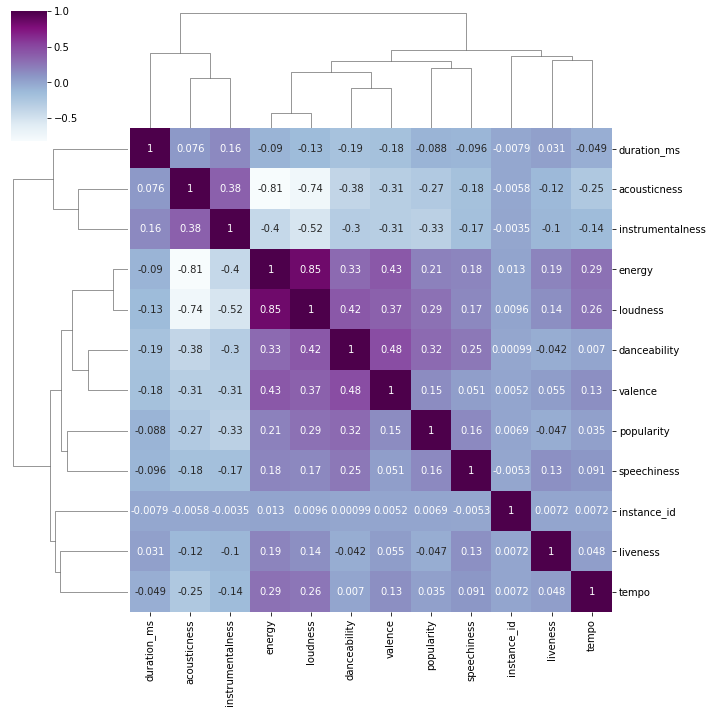

In [ ]:
ax = plt.figure(figsize=(15, 10))
sns.clustermap(df.corr(), annot=True, cmap="BuPu")

#### Tempo by music genre

In [ ]:
df.groupby(["music_genre"])["tempo"].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Anime/J-Pop,4497.0,126.799978,33.063462,47.704,98.96000,127.9720,149.98900,220.276
Blues,4470.0,121.379962,30.326710,47.587,97.64475,118.3720,141.22525,215.918
Classical,4500.0,104.053190,30.944454,34.347,79.23325,96.5515,127.30200,212.923
Country,4486.0,123.784286,30.082410,55.513,99.75675,123.0420,144.67175,217.538
Electronic,4466.0,125.930571,26.482007,35.551,107.83275,125.9830,144.97300,220.041
Jazz,4521.0,111.699415,29.648000,34.765,90.00300,104.8380,127.99800,213.038
Rap/Hip-Hop,4517.0,120.677558,29.746188,47.092,94.43000,121.1890,141.91400,213.788
Rock,4561.0,122.669614,28.925499,37.114,99.91900,121.1040,142.01600,219.331


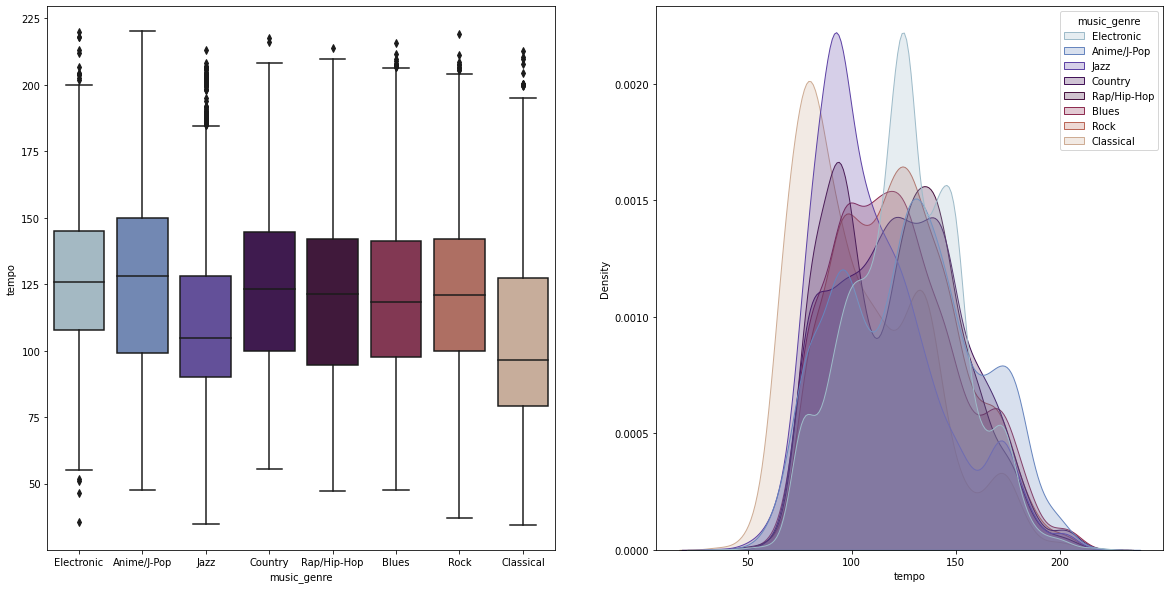

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
sns.boxplot(data=df, x='music_genre', y='tempo', palette="twilight", ax=axes[0])
sns.kdeplot(data=df, x='tempo', hue='music_genre', palette="twilight", fill=True, alpha=0.25, ax=axes[1])

plt.show()

#### Popularity by music genre

In [ ]:
df.groupby(["music_genre"])["popularity"].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Anime/J-Pop,5000.0,24.2716,9.675151,0.0,17.00,23.0,30.0,65.0
Blues,5000.0,34.8040,9.716422,0.0,28.75,33.0,39.0,80.0
Classical,5000.0,29.3158,14.100519,0.0,25.00,32.0,38.0,68.0
Country,5000.0,46.0100,9.771540,0.0,39.00,44.0,52.0,82.0
Electronic,5000.0,38.1118,9.715378,0.0,31.00,37.0,44.0,96.0
Jazz,5000.0,40.9286,9.517333,0.0,36.00,40.0,46.0,79.0
Rap/Hip-Hop,5000.0,59.4334,8.280681,22.0,53.00,58.0,64.0,95.0
Rock,5000.0,59.6412,7.359110,0.0,55.00,59.0,64.0,90.0


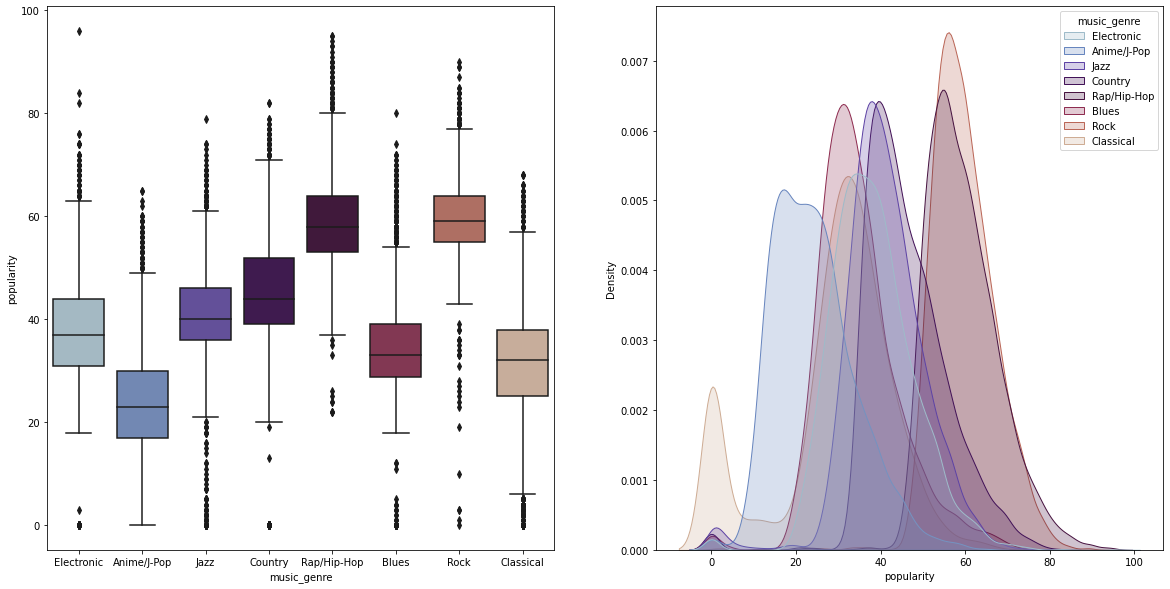

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
sns.boxplot(data=df, x='music_genre', y='popularity', palette="twilight", ax=axes[0])
sns.kdeplot(data=df, x='popularity', hue='music_genre', palette="twilight", ax=axes[1], fill=True, alpha=0.25)

plt.show()

#### Danceability by music genre

In [ ]:
df.groupby(["music_genre"])["danceability"].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Anime/J-Pop,5000.0,0.471002,0.148760,0.0606,0.37900,0.488,0.57800,0.905
Blues,5000.0,0.529243,0.144694,0.1180,0.42600,0.529,0.63500,0.967
Classical,5000.0,0.306560,0.135138,0.0600,0.19800,0.301,0.40200,0.775
Country,5000.0,0.577316,0.108931,0.2030,0.50900,0.581,0.64725,0.953
Electronic,5000.0,0.619220,0.147034,0.0822,0.52900,0.629,0.72400,0.979
Jazz,5000.0,0.584736,0.159487,0.0596,0.47200,0.600,0.70500,0.976
Rap/Hip-Hop,5000.0,0.706425,0.136082,0.1970,0.61900,0.723,0.80900,0.973
Rock,5000.0,0.539230,0.134110,0.0645,0.45175,0.546,0.63300,0.920


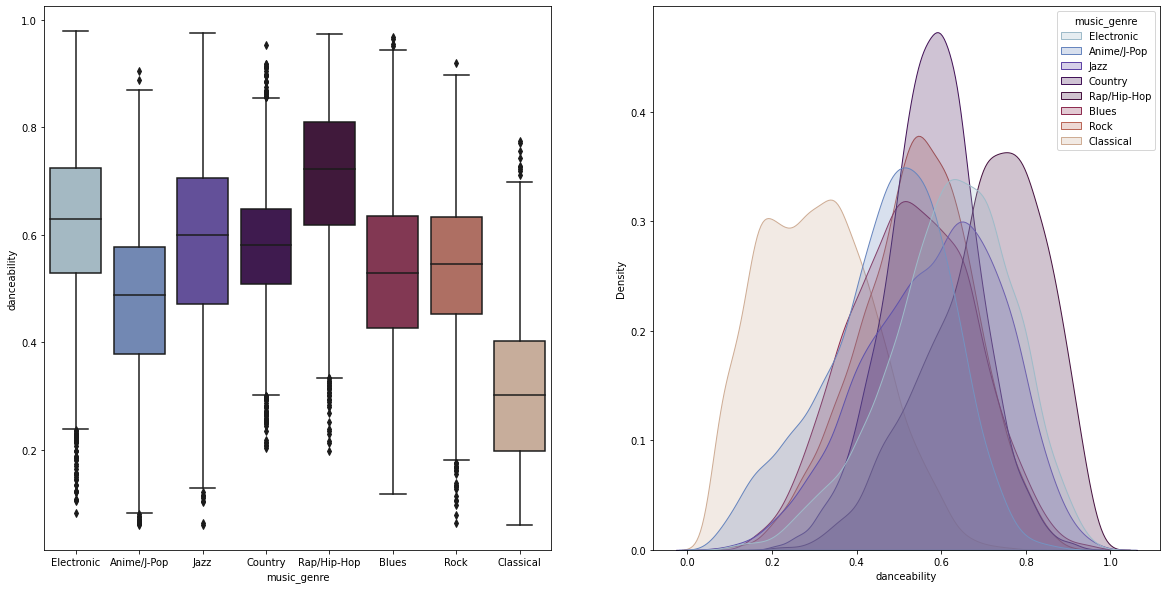

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
sns.boxplot(data=df, x='music_genre', y='danceability', palette="twilight", ax=axes[0])
sns.kdeplot(data=df, x='danceability', hue='music_genre', palette="twilight", ax=axes[1], fill=True, alpha=0.25)

plt.show()

#### Danceability by music genre

In [ ]:
df.groupby(["music_genre"])["acousticness"].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Anime/J-Pop,5000.0,0.286968,0.362371,0.000000,0.005193,0.06650,0.57600,0.996
Blues,5000.0,0.317830,0.306287,0.000002,0.037875,0.21500,0.55725,0.996
Classical,5000.0,0.869139,0.256728,0.000001,0.909000,0.96700,0.98800,0.996
Country,5000.0,0.268827,0.262072,0.000028,0.046525,0.17500,0.43425,0.981
Electronic,5000.0,0.121971,0.201634,0.000002,0.004060,0.02620,0.14000,0.985
Jazz,5000.0,0.494564,0.338640,0.000002,0.153000,0.51500,0.81900,0.996
Rap/Hip-Hop,5000.0,0.172298,0.189847,0.000008,0.029400,0.09865,0.25500,0.985
Rock,5000.0,0.191394,0.249029,0.000001,0.008555,0.06995,0.29600,0.994


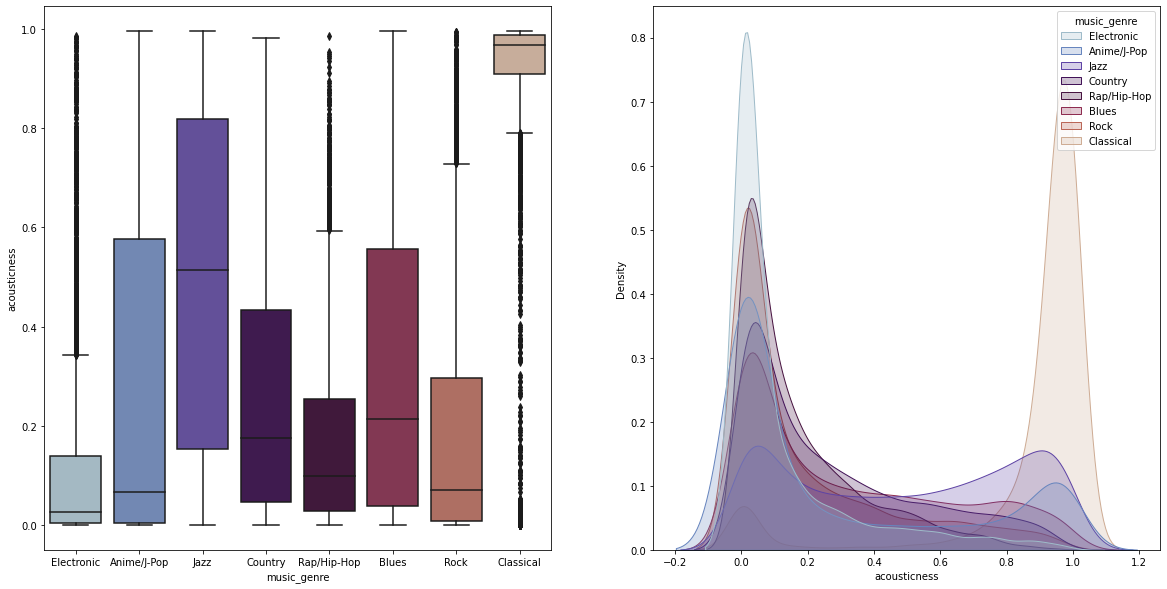

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
sns.boxplot(data=df, x='music_genre', y='acousticness', palette="twilight", ax=axes[0])
sns.kdeplot(data=df, x='acousticness', hue='music_genre', palette="twilight", ax=axes[1], fill=True, alpha=0.25)

plt.show()

#### Energy by music genre

In [ ]:
df.groupby(["music_genre"])["energy"].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Anime/J-Pop,5000.0,0.664568,0.300289,0.000943,0.4220,0.783,0.92500,0.999
Blues,5000.0,0.609753,0.227894,0.009570,0.4440,0.629,0.80000,0.998
Classical,5000.0,0.176534,0.225583,0.000792,0.0366,0.101,0.20700,0.994
Country,5000.0,0.638903,0.199112,0.021000,0.4980,0.670,0.80400,0.991
Electronic,5000.0,0.738636,0.187862,0.021100,0.6110,0.773,0.89700,0.999
Jazz,5000.0,0.474847,0.239362,0.002110,0.2890,0.478,0.65700,0.997
Rap/Hip-Hop,5000.0,0.646317,0.154832,0.113000,0.5390,0.647,0.75600,0.997
Rock,5000.0,0.687792,0.200963,0.002590,0.5510,0.723,0.85225,0.998


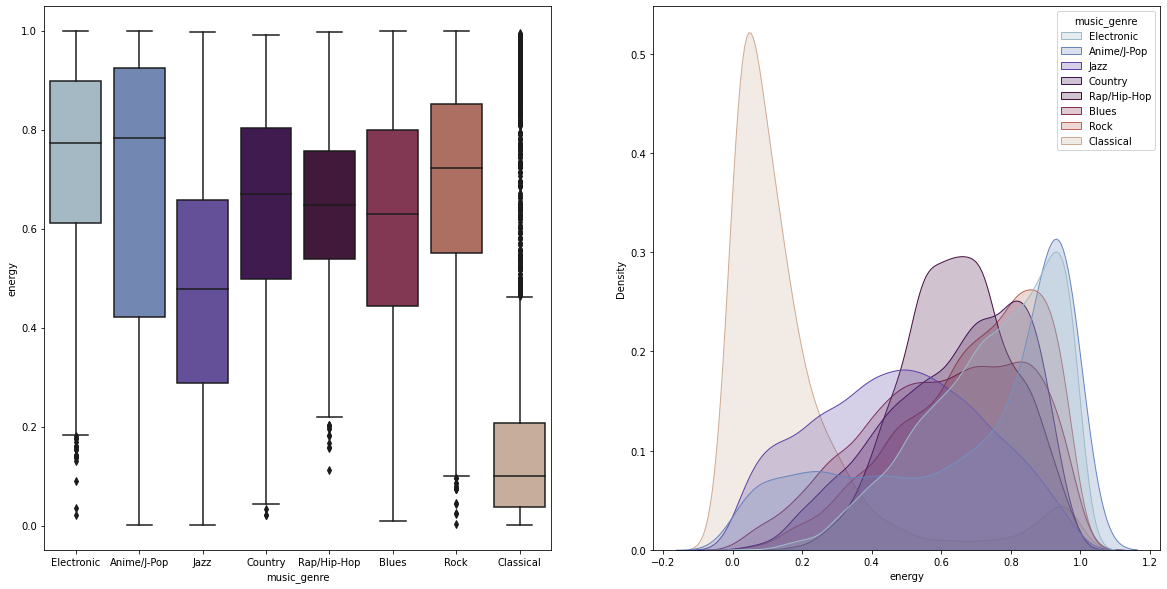

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
sns.boxplot(data=df, x='music_genre', y='energy', palette="twilight", ax=axes[0])
sns.kdeplot(data=df, x='energy', hue='music_genre', palette="twilight", ax=axes[1], alpha=0.25, fill=True)

plt.show()

#### Duration by music genre

In [ ]:
df.groupby(["music_genre"])["duration_ms"].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Anime/J-Pop,4527.0,230705.681025,84882.448607,30027.0,183460.00,238820.0,278333.00,1295600.0
Blues,4517.0,253820.226699,114204.231455,30097.0,186187.00,230227.0,288053.00,2019293.0
Classical,4489.0,309661.894186,209668.727286,15509.0,180173.00,262000.0,381160.00,3195440.0
Country,4508.0,216899.031721,44599.933061,56227.0,188806.75,211626.5,237191.75,599315.0
Electronic,4517.0,270703.431260,150789.778139,34059.0,206667.00,245217.0,310747.00,4830606.0
Jazz,4503.0,264371.026205,113298.423695,19693.0,190037.00,247850.0,314026.50,1352413.0
Rap/Hip-Hop,4520.0,218606.596681,57960.690292,33093.0,181938.00,214033.5,250136.00,592920.0
Rock,4493.0,236833.312041,64848.129538,55253.0,197467.00,225347.0,263253.00,811077.0


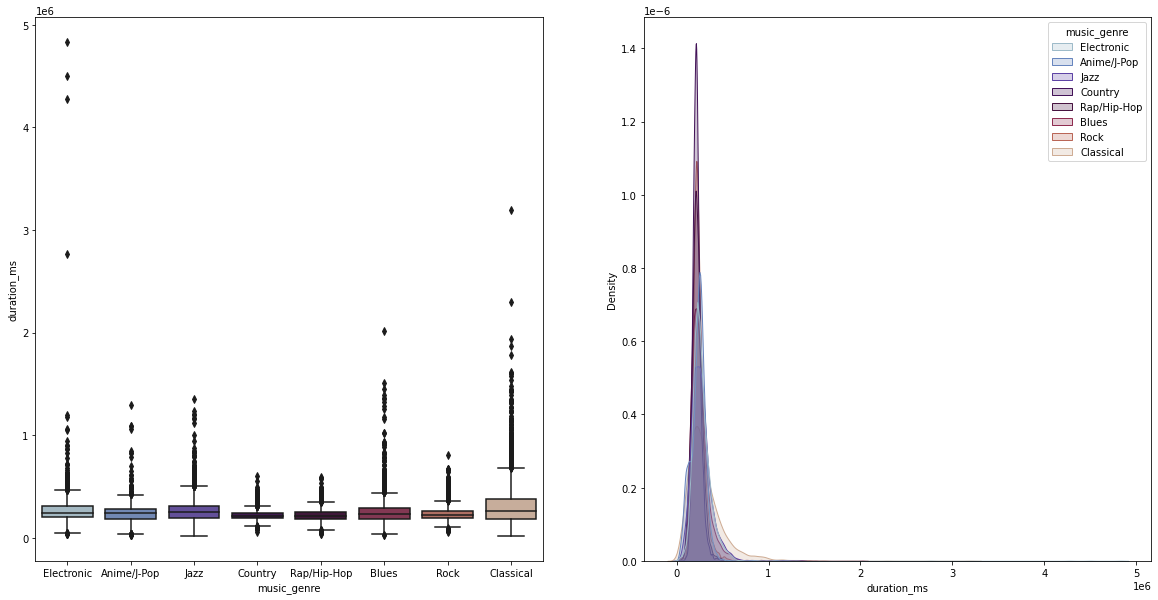

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
sns.boxplot(data=df, x='music_genre', y='duration_ms', palette="twilight", ax=axes[0])
sns.kdeplot(data=df, x='duration_ms', hue='music_genre', palette="twilight", ax=axes[1], fill=True, alpha=0.25)

plt.show()

#### Speechiness by music genre

In [ ]:
df.groupby(["music_genre"])["speechiness"].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Anime/J-Pop,5000.0,0.064608,0.052907,0.0229,0.034800,0.0452,0.0708,0.498
Blues,5000.0,0.062157,0.062483,0.0231,0.033875,0.0431,0.0650,0.942
Classical,5000.0,0.051575,0.037965,0.0239,0.038400,0.0433,0.0506,0.631
Country,5000.0,0.049032,0.048846,0.0223,0.029500,0.0346,0.0456,0.689
Electronic,5000.0,0.098891,0.098593,0.0234,0.040100,0.0575,0.1110,0.774
Jazz,5000.0,0.073629,0.081572,0.0226,0.035300,0.0438,0.0676,0.939
Rap/Hip-Hop,5000.0,0.197185,0.135161,0.0242,0.077600,0.1750,0.2900,0.932
Rock,5000.0,0.053403,0.041686,0.0224,0.031900,0.0391,0.0563,0.539


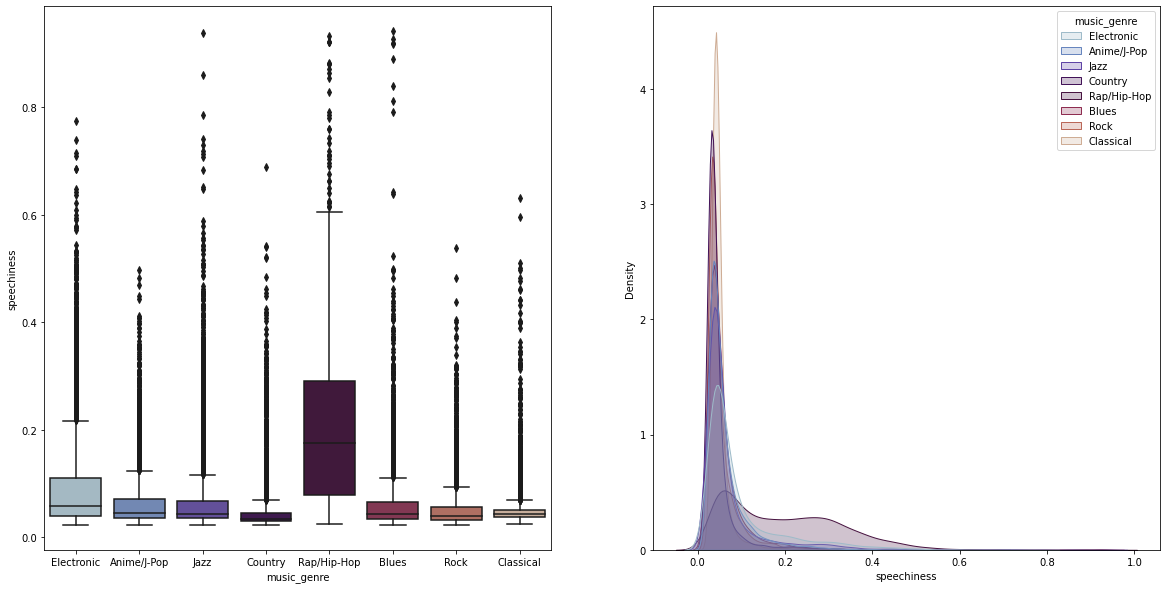

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
sns.boxplot(data=df, x='music_genre', y='speechiness', palette="twilight", ax=axes[0])
sns.kdeplot(data=df, x='speechiness', hue='music_genre', palette="twilight", ax=axes[1], fill=True, alpha=0.25)

plt.show()


#### Loudness by music genre

In [ ]:
df.groupby(["music_genre"])["loudness"].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Anime/J-Pop,5000.0,-7.963515,6.246825,-41.234,-10.69125,-5.6605,-3.58900,1.893
Blues,5000.0,-9.009528,3.833429,-31.284,-11.31600,-8.4555,-6.17675,3.744
Classical,5000.0,-21.586253,7.730315,-47.046,-26.44300,-21.8725,-17.23300,-2.304
Country,5000.0,-7.297150,3.210097,-27.119,-8.80225,-6.5275,-5.02000,-0.521
Electronic,5000.0,-7.034238,3.683159,-25.582,-9.26050,-6.4650,-4.37600,1.585
Jazz,5000.0,-11.185364,4.662576,-35.200,-13.62125,-10.3455,-7.84350,-1.002
Rap/Hip-Hop,5000.0,-6.810146,2.466072,-25.602,-8.13750,-6.4725,-5.14975,1.012
Rock,5000.0,-7.224354,3.311059,-37.124,-9.00050,-6.4400,-4.83075,1.023


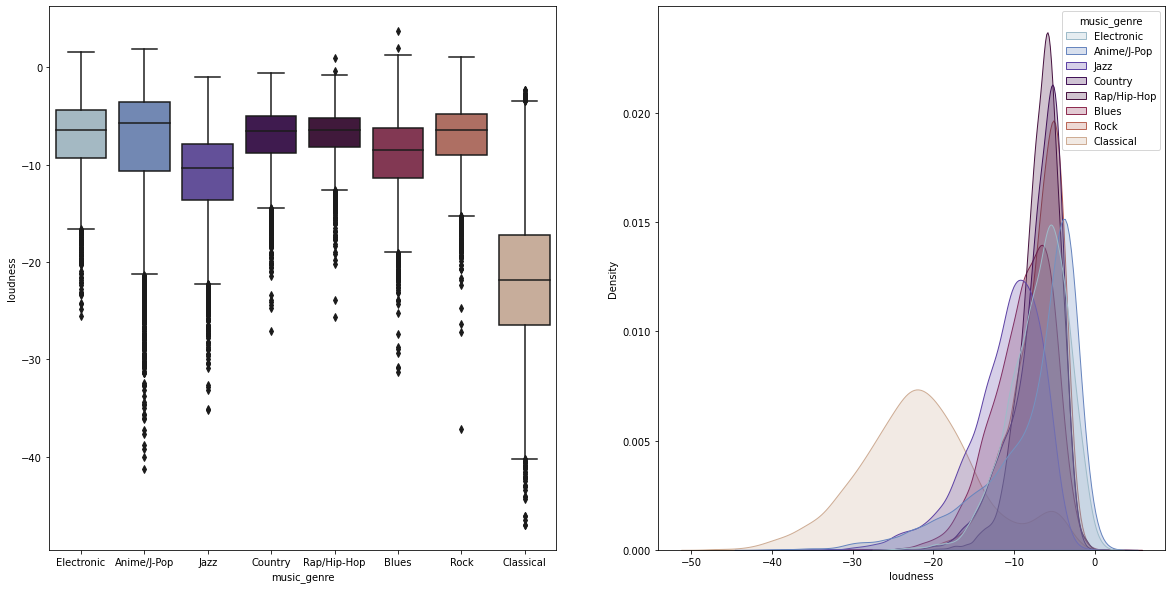

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
sns.boxplot(data=df, x='music_genre', y='loudness', palette="twilight", ax=axes[0])
sns.kdeplot(data=df, x='loudness', hue='music_genre', palette="twilight", ax=axes[1], fill=True, alpha=0.25)

plt.show()

#### Valence by music genre

In [ ]:
df.groupby(["music_genre"])["valence"].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Anime/J-Pop,5000.0,0.437670,0.248353,0.0000,0.23200,0.4390,0.63200,0.990
Blues,5000.0,0.580788,0.224741,0.0315,0.41000,0.5900,0.76000,0.985
Classical,5000.0,0.210523,0.197650,0.0000,0.05650,0.1400,0.30525,0.982
Country,5000.0,0.536732,0.221114,0.0396,0.36100,0.5270,0.71625,0.977
Electronic,5000.0,0.389884,0.239673,0.0205,0.18900,0.3585,0.55900,0.992
Jazz,5000.0,0.509248,0.251076,0.0289,0.29675,0.5150,0.71100,0.985
Rap/Hip-Hop,5000.0,0.463732,0.216440,0.0336,0.29600,0.4575,0.62700,0.970
Rock,5000.0,0.520361,0.233627,0.0277,0.34000,0.5160,0.70300,0.985


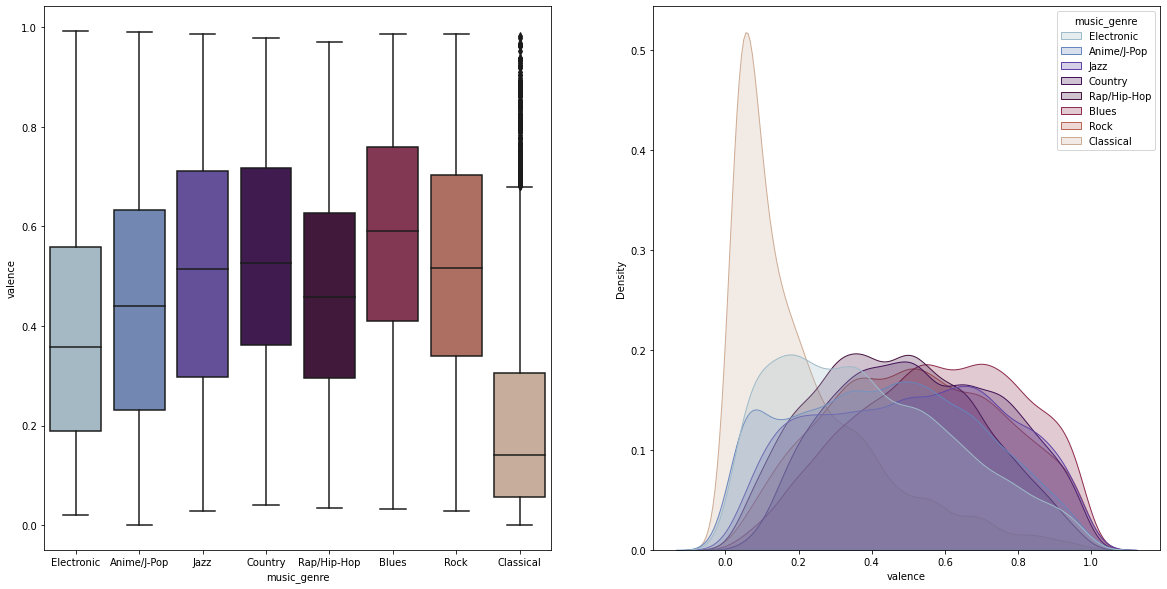

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
sns.boxplot(data=df, x='music_genre', y='valence', palette="twilight", ax=axes[0])
sns.kdeplot(data=df, x='valence', hue='music_genre', palette="twilight", ax=axes[1], fill=True, alpha=0.25)

plt.show()

#### Artist statistics

Text(0.5, 1.0, 'Songs per artist')

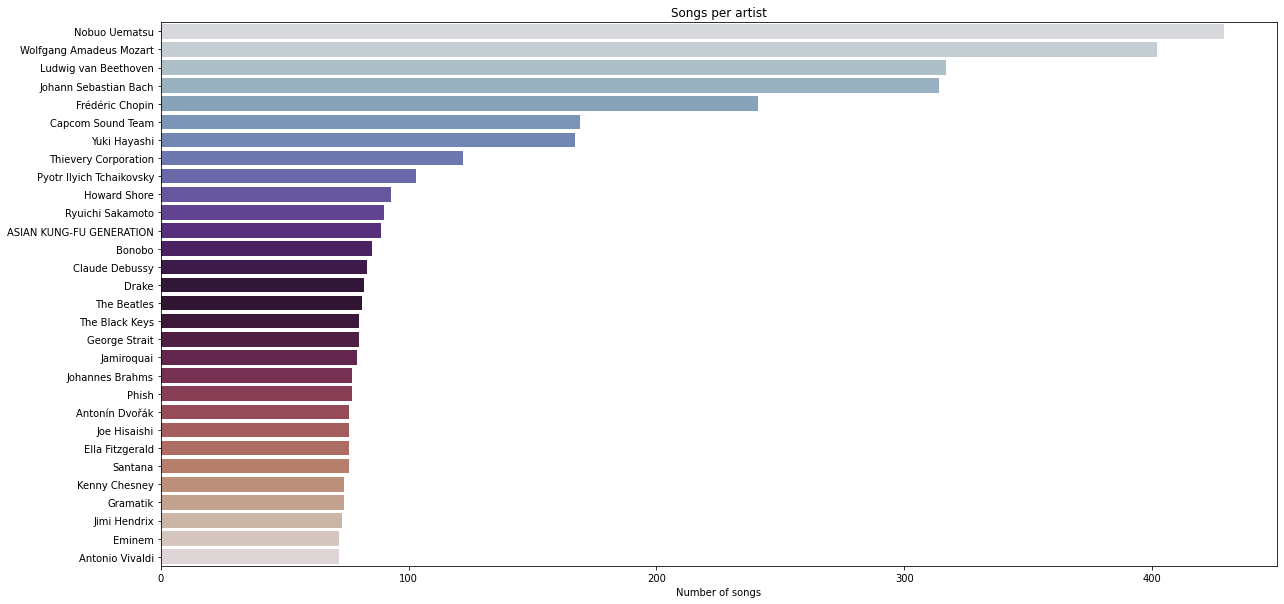

In [ ]:
plt.figure(figsize=(20, 10))
data = df["artist_name"].value_counts()[1:31]
sns.barplot(x=data, y=data.index, palette="twilight")
plt.xlabel("Number of songs")

plt.title("Songs per artist")

(70.0, 85.0)

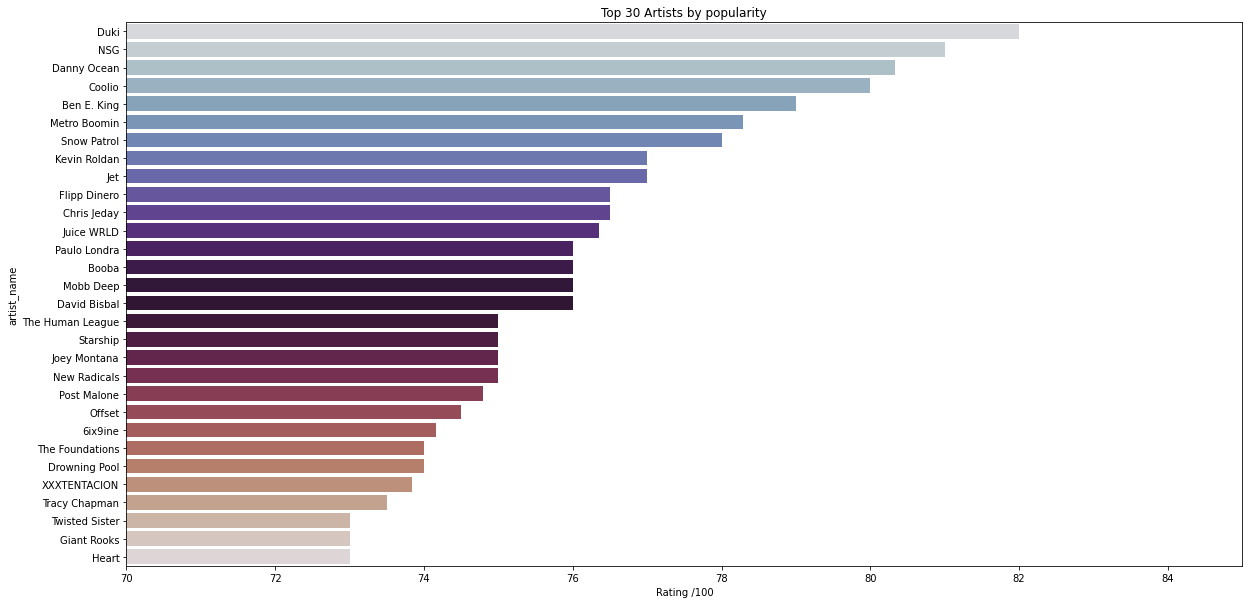

In [ ]:
plt.figure(figsize=(20, 10))
data = df.groupby(["artist_name"]).popularity.apply(np.mean).sort_values(ascending=False)[:30]
sns.barplot(x=data, y=data.index, palette="twilight")
plt.xlabel("Rating /100")
plt.title("Top 30 Artists by popularity")
plt.xlim(70, 85)

#### Key by music genre

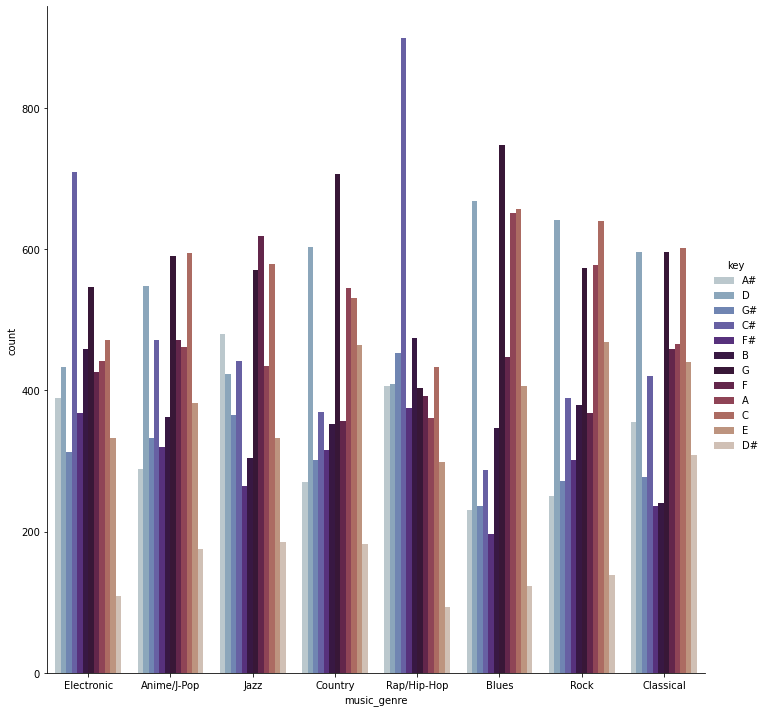

In [ ]:
sns.catplot(data=df, x= "music_genre", hue="key", height=10, kind="count", palette="twilight")

#### Mode by music genre

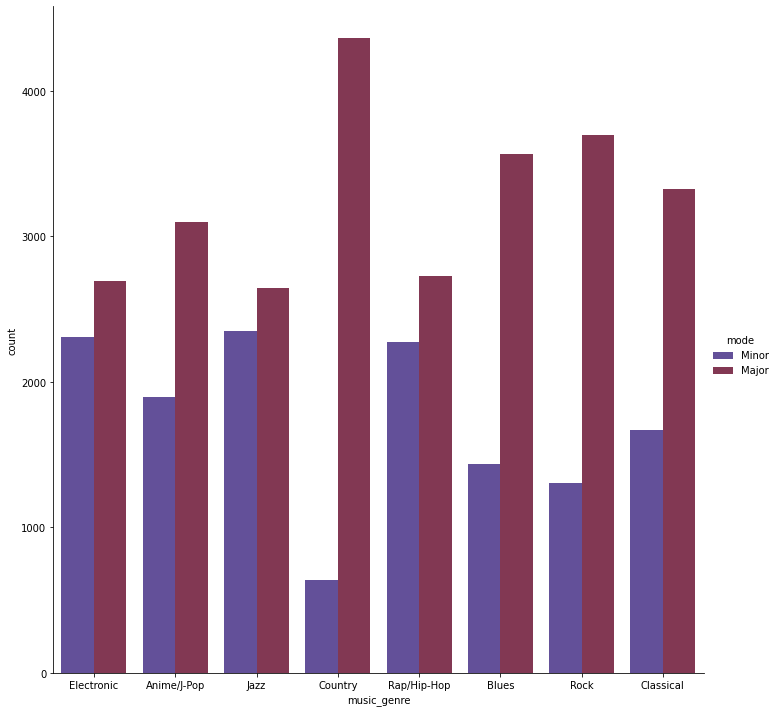

In [ ]:
sns.catplot(data=df, x= "music_genre", hue="mode", height=10, kind="count", palette="twilight")

## Feature Engineering

In [ ]:
data = df.copy()
data["track_name_length"] = data["track_name"].str.len()
data.groupby(["music_genre"])["track_name_length"].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Anime/J-Pop,5000.0,15.4680,12.620746,1.0,7.0,12.0,19.0,112.0
Blues,5000.0,19.9576,13.233111,1.0,12.0,17.0,24.0,119.0
Classical,5000.0,48.2104,27.889749,3.0,26.0,47.0,65.0,250.0
Country,5000.0,18.7490,11.491441,1.0,11.0,16.0,23.0,116.0
Electronic,5000.0,17.1644,11.713053,1.0,8.0,13.0,23.0,125.0
Jazz,5000.0,18.0034,12.456967,1.0,10.0,15.0,22.0,142.0
Rap/Hip-Hop,5000.0,16.4706,12.351585,1.0,8.0,13.0,21.0,139.0
Rock,5000.0,17.4462,11.363826,1.0,10.0,14.0,21.0,123.0


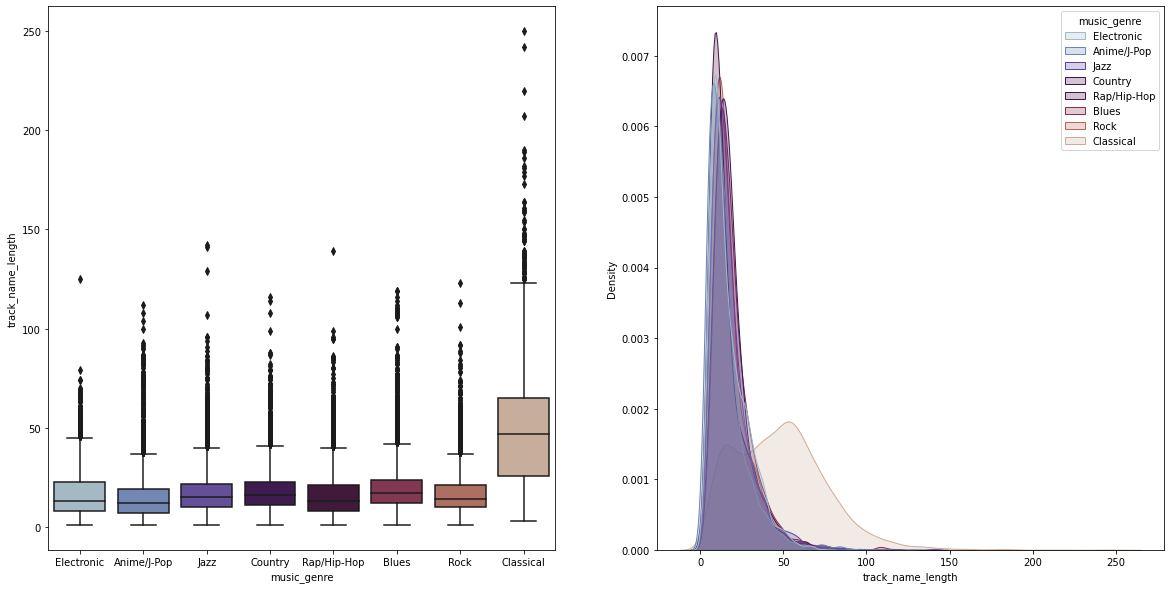

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
sns.boxplot(data=data, x='music_genre', y='track_name_length', palette="twilight", ax=axes[0])
sns.kdeplot(data=data, x='track_name_length', hue='music_genre', palette="twilight", ax=axes[1], fill=True, alpha=0.25)

plt.show()

In [ ]:
data["artist_name_length"] = data["artist_name"].str.len()
data.groupby(["music_genre"])["artist_name_length"].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Anime/J-Pop,5000.0,12.1334,5.276815,2.0,8.0,12.0,15.0,35.0
Blues,5000.0,13.4148,5.315185,1.0,10.0,12.0,16.0,40.0
Classical,5000.0,16.0526,4.529540,4.0,13.0,15.0,20.0,52.0
Country,5000.0,12.5834,3.222658,3.0,11.0,12.0,14.0,41.0
Electronic,5000.0,9.7910,4.113186,2.0,7.0,9.0,12.0,26.0
Jazz,5000.0,12.4350,4.677366,3.0,10.0,12.0,14.0,51.0
Rap/Hip-Hop,5000.0,9.6848,3.947222,2.0,7.0,10.0,11.0,32.0
Rock,5000.0,11.9572,4.908379,2.0,9.0,11.0,14.0,46.0


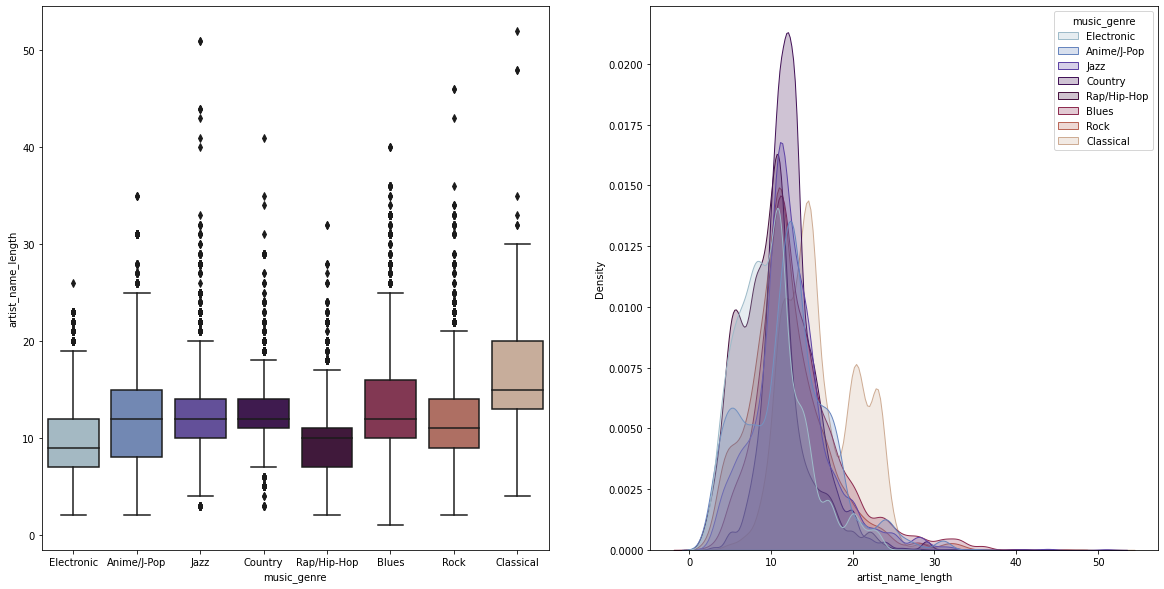

In [ ]:
data.groupby(["music_genre"])["artist_name_length"].describe()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
sns.boxplot(data=data, x='music_genre', y='artist_name_length', palette="twilight", ax=axes[0])
sns.kdeplot(data=data, x='artist_name_length', hue='music_genre', palette="twilight", ax=axes[1], fill=True, alpha=0.25)

plt.show()

In [ ]:
def detect_japanese(text):
  ''' detects if text contains Japanese characters '''
  languages = [Language.ENGLISH, Language.JAPANESE]
  detector = LanguageDetectorBuilder.from_languages(*languages).build()
  detected = detector.detect_language_of(text)
  if detected == Language.JAPANESE:
    return True
  else:
    return False

In [ ]:
data["Japanese"] = data["artist_name"].apply(detect_japanese) | data["track_name"].apply(detect_japanese)
data["Japanese"].replace({False:0, True:1}, inplace=True)

In [ ]:
data.groupby(["music_genre"])["Japanese"].sum()

music_genre
Anime/J-Pop    1147
Blues             0
Classical        32
Country           0
Electronic        3
Jazz              8
Rap/Hip-Hop       0
Rock              0
Name: Japanese, dtype: int64

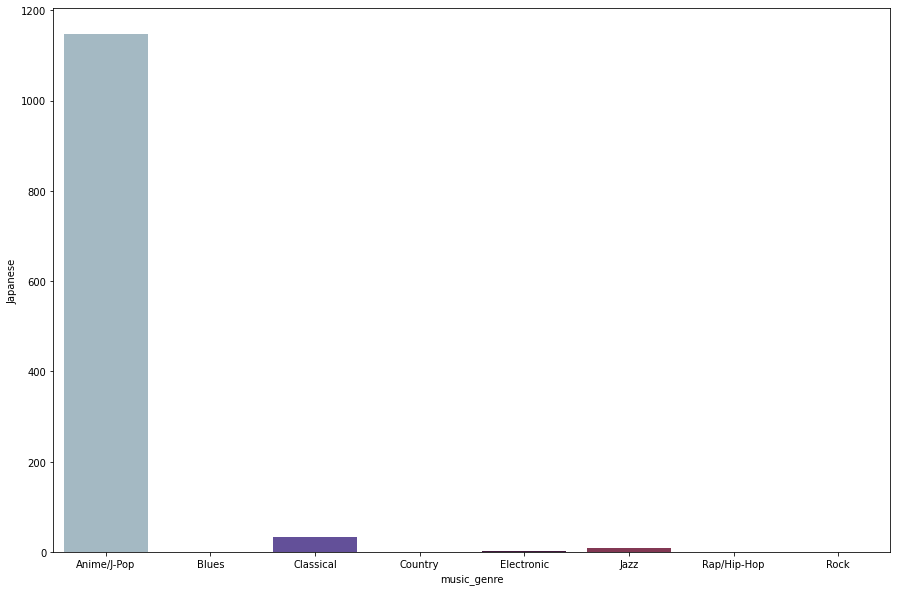

In [ ]:
plt.figure(figsize=(15, 10))
test_data = data.groupby(["music_genre"])["Japanese"].sum()
sns.barplot(x= test_data.index, y=test_data, palette="twilight")
plt.show()

In [ ]:
pca_columns = ["tempo", "popularity", "acousticness", "loudness", "instrumentalness",
                   "energy", "danceability", "speechiness", "valence", "duration_ms", "Japanese"]

pca_data = data.copy()
pca_target = pca_data.pop("music_genre")
pca_data = pca_data.loc[:, pca_columns]
pca_data = fill_missing(pca_data, impute=True)


pca_data = (pca_data - pca_data.mean(axis=0))/pca_data.std(axis=0)
pca = PCA()
X_pca = pca.fit_transform(pca_data)

component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

loadings = pd.DataFrame(
    pca.components_.T,
    columns = component_names,
    index = pca_data.columns

)

In [ ]:
data.index = np.arange(0, 40000)
data = pd.concat([data, X_pca], axis=1)




## Modelling

#### Support Vector Classifier

In [ ]:
data.drop(["instance_id", "artist_name", "track_name", "obtained_date"], inplace=True, axis=1)

In [ ]:
X = data.copy()
y = X.pop("music_genre")
X_train, X_valid, y_train, y_valid = train_test_split(X, y)

X_train = fill_missing(X_train, impute=True)
X_valid = fill_missing(X_valid, impute=True)

X_train = pd.get_dummies(X_train, columns=["key", "mode"])
X_valid = pd.get_dummies(X_valid, columns=["key", "mode"])

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

In [ ]:
clf = svm.SVC()

In [ ]:
clf.fit(X_train, y_train)
prediction = clf.predict(X_valid)

Accuracy (using SVM):  0.7071


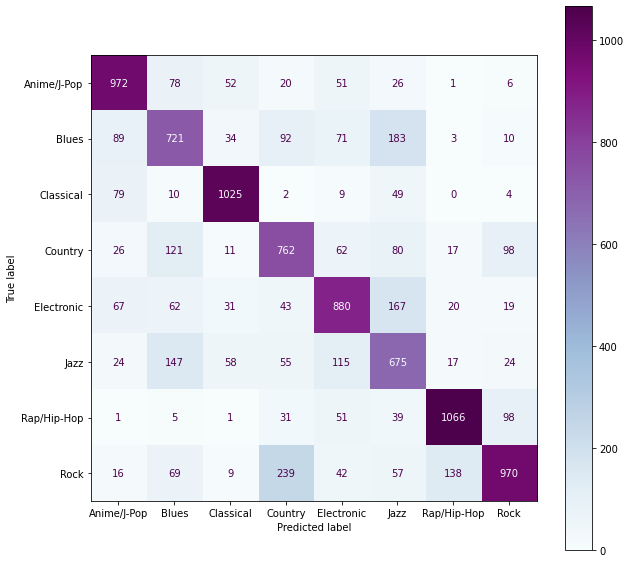

In [ ]:
scikit_accuracy = accuracy_score(prediction, y_valid)
print("Accuracy (using SVM): ", scikit_accuracy.round(4))
fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_predictions(prediction, y_valid, cmap="BuPu", ax=ax)

#### XGBoost

In [ ]:
xgb_clf = XGBClassifier(learning_rate=0.05, n_estimators=200, random_state=0)
xgb_clf.fit(X_train, y_train)
xgb_prediction = xgb_clf.predict(X_valid)

Accuracy (using XGBoost):  0.7194


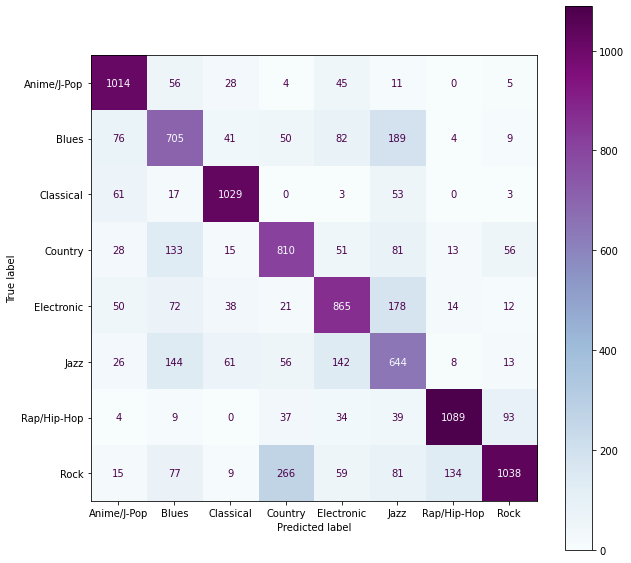

In [ ]:
scikit_accuracy = accuracy_score(xgb_prediction, y_valid)
print("Accuracy (using XGBoost): ", scikit_accuracy.round(4))
fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_predictions(xgb_prediction, y_valid, cmap="BuPu", ax=ax)

#### Neural Networks

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train.replace({"Anime/J-Pop": 0, "Blues":1, "Classical":2, "Country":3,
                           "Electronic":4, "Jazz":5, "Rap/Hip-Hop":6, "Rock":7}, inplace=True)
y_valid.replace({"Anime/J-Pop": 0, "Blues":1, "Classical":2, "Country":3,
                           "Electronic":4, "Jazz":5, "Rap/Hip-Hop":6, "Rock":7}, inplace=True)

y_train = to_categorical(y_train)
y_valid = to_categorical(y_valid)

In [ ]:
model = keras.Sequential([
         
    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),

    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),

    layers.Dense(256, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(rate=0.3),

    layers.Dense(units=8, activation="sigmoid")

])

In [ ]:
model.compile(    
    optimizer="Adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
         )

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=200,
    callbacks=[early_stopping]
)

Epoch 1/200
118/118 [==============================] - 4s 17ms/step - loss: 1.3141 - accuracy: 0.5509 - val_loss: 1.0560 - val_accuracy: 0.6466
Epoch 2/200
118/118 [==============================] - 2s 13ms/step - loss: 1.0397 - accuracy: 0.6266 - val_loss: 0.8998 - val_accuracy: 0.6831
Epoch 3/200
118/118 [==============================] - 2s 13ms/step - loss: 0.9722 - accuracy: 0.6457 - val_loss: 0.8591 - val_accuracy: 0.6938
Epoch 4/200
118/118 [==============================] - 2s 13ms/step - loss: 0.9347 - accuracy: 0.6573 - val_loss: 0.8524 - val_accuracy: 0.6935
Epoch 5/200
118/118 [==============================] - 2s 13ms/step - loss: 0.9073 - accuracy: 0.6680 - val_loss: 0.8338 - val_accuracy: 0.6960
Epoch 6/200
118/118 [==============================] - 2s 13ms/step - loss: 0.8834 - accuracy: 0.6774 - val_loss: 0.8218 - val_accuracy: 0.7053
Epoch 7/200
118/118 [==============================] - 2s 13ms/step - loss: 0.8628 - accuracy: 0.6839 - val_loss: 0.8156 - val_accuracy:

In [ ]:
output = model.predict(X_valid)
predictions = np.argmax(output, axis=1)
true_values = np.argmax(y_valid, axis=1)
neural_net_accuracy = accuracy_score(predictions, true_values)

313/313 [==============================] - 1s 2ms/step


In [ ]:
genre_mapping = {0:"Anime/J-Pop", 1:"Blues", 2:"Classical", 3:"Country",
                  4:"Electronic", 5:"Jazz", 6:"Rap/Hip-Hop", 7:"Rock"}
predictions = [genre_mapping[i] for i in predictions]
true_values = [genre_mapping[i] for i in true_values]

Accuracy (using a neural network):  0.7339


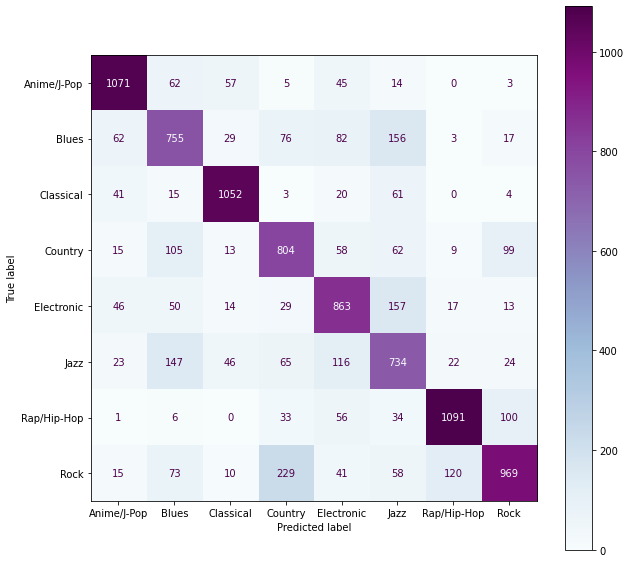

In [ ]:
print("Accuracy (using a neural network): ", neural_net_accuracy.round(4))
fig, ax = plt.subplots(figsize=(10, 10))
ConfusionMatrixDisplay.from_predictions(predictions, true_values, cmap="BuPu", ax=ax)